<h1><b>1. Conoscenza Business</b></h1>
<h3><b>1.1 Obiettivo</b></h3>
<p>A partire dal dataset che contiene le transazioni di un rivenditore online registrato nel Regno Unito, lo scopo delle nostre analisi è identificare quali sono i prodotti più venduti e più rimborsati e se c'è una correlazione con il loro prezzo, verificare se alcuni prodotti vengono acquistati insieme per creare pacchetti promozionali, analizzare in quali sono i paesi vengono effettuate più vendite, che quindi fanno generare un guadagno più alto al rivenditore, segmentare i clienti con comportamenti di acquisto simili per personalizzare marketing e offerte, verificare la presenza di tendenze di acquisto stagionali o cicliche e infine, sulla base degli ordini effettuati in passato, prevedere come procederanno le vendite in futuro.</p>

<h1><b>2. Conoscenza Dati</b></h1>

<h3><b>2.1. Raccolta Dati</b></h3>

In [79]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('data.xlsx')

# Display the first few rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h3><b>2.3. Descrizione Dati</b></h3>

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<p>Il dataset contiene 8 colonne:</p>
<ul>
    <li><b>InvoiceNo:</b> Numero di fattura intero di 6 cifre assegnato in modo univoco a ciascuna transazione. Se questo codice inizia con la lettera 'c', indica una cancellazione.. Variabile numerica.</li>
    <li><b>StockCode:</b> Codice prodotto. Variabile numerica.</li>
    <li><b>Description:</b> Descrizione prodotto. Variabile categorica.</li>
    <li><b>Quantity:</b> Quantità acquistata. Variabile numerica.</li>
    <li><b>InvoiceDate:</b> Data e ora della transazione. Variabile temporale.</li>
    <li><b>UnitPrice:</b> Prezzo unitario. Variabile numerica.</li>
    <li><b>CustomerID:</b> ID cliente. Variabile numerica.</li>
    <li><b>Country:</b> Paese. Variabile categorica.</li>
</ul>

<h4><b>2.4. Esploarzione Dati</b></h4>

In [81]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


<p>Considerazioni:</p>
<ul>
    <li>Presenza di valori negativi nelle colonne <b>Quantity</b> e <b>UnitPrice</b>, che potrebbe essere dovuta a resi o cancellazioni di ordini, oppure sconti.</li>
    <li>Presenza di valori mancanti nella colonna <b>CustomerID</b>. Dedotta dal fatto che il conteggio (<i>count</i>) dei valori non nulli in quella colonna e inferiore al numero totale di righe nel DataFrame. Questo potrebbe essere dovuto al fatto che il negozio da la possibilità di effettuare ordini senza per forza registrarsi.</li>
    <li>La grande variabilità dei prezzi unitari ci fa capire che il negozio vende una vasta gamma di prodotti con prezzi molto diversi</li>
</ul>

<h3><b>2.5 Verifica della Qualità dei Dati</b></h3>
<h4>Controllo Valori Mancanti</h4>

In [82]:
if df.isnull().sum().sum() > 0:
    print("Numero di valori Mancanti per Colonna:", df.isnull().sum())
else:
    print("Nessun valore mancante trovato")

Numero di valori Mancanti per Colonna: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


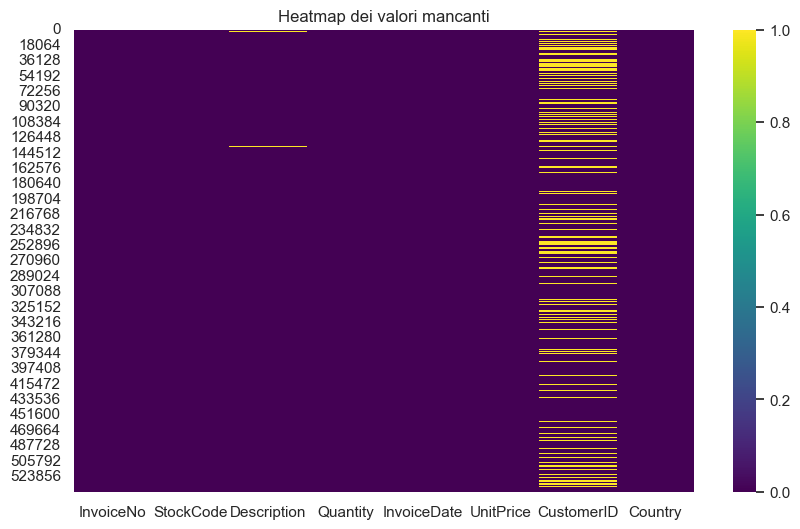

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap dei valori mancanti')
plt.show()

<h4><b>Spiegazione grafico:</b></h4>
<ul>
    <li>Nell'asse x abbiamo le colonne del dataset: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID e Country</li>
    <li>Nell'asse y abbiamo le righe del dataset</li>
    <li>I colori chiari indicano la presenza di un valore mancante in una determinata cella, che è l'incrocio tra una riga e una colonna</li>
    <li>I colori scuri indicano che il valore invece è presente</li>
</ul>

<p><b>Interpretazione grafico:</b></p>
<ul>
    <li>Le colonne InvoiceNo, StockCode, Quantity, InvoiceDate, Country e UnitPrice non presentano apparentemente valori mancanti (sono completamente viola scuro)</li>
    <li>La colonna Description ha alcuni valori mancanti, concentrati in una zona specifica. Questo potrebbe indicare un problema di inserimento dati in un determinato periodo o per specifici prodotti</li>
    <li>La colonna CustomerID mostra una grande quantità di valori mancanti</li>
</ul>

<h4>Controllo Valori Duplicati</h4>

In [84]:
# Controlla e stampa il numero di righe duplicate basate sulle colonne specificate
if df.duplicated(subset=['CustomerID', 'InvoiceDate', 'StockCode', 'Quantity', 'UnitPrice', 'Description', 'Country']).sum() > 0:
    print("Numero di righe duplicate:", df.duplicated(subset=['CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice', 'Description', 'Country']).sum())
else:
    print("Non ci sono righe duplicate")

Numero di righe duplicate: 6007


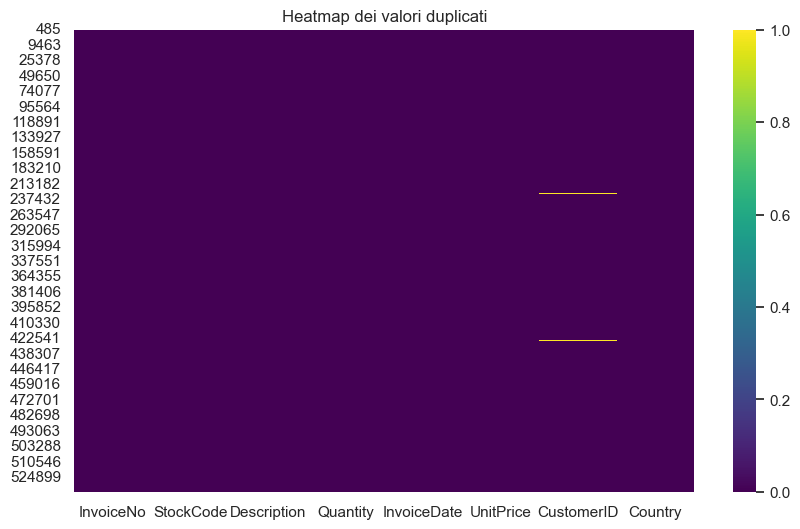

In [85]:
# Trova i duplicati
duplicates = df.duplicated(keep=False)
# Se si mette keep[True] troverà solo la prima occorrenza
# Se si mette keep[False] troverà tutte le occorrenze

# Crea una heatmap dei duplicati
plt.figure(figsize=(10, 6))
sns.heatmap(df[duplicates].isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap dei valori duplicati')
plt.show()

<p><b>Interpretazione grafico:</b></p>
<ul>
    <li>Sono presenti delle celle colorate di giallo che indicano la presenza di valori duplicati nella colonna CustomerID</li>
</ul>

<h4>Verifica Anomalie</h4>

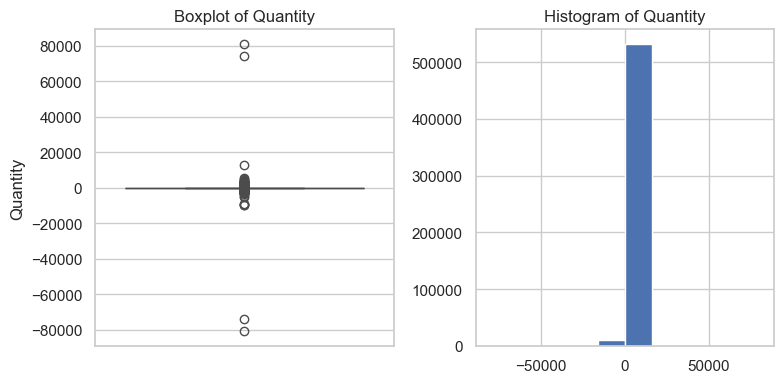

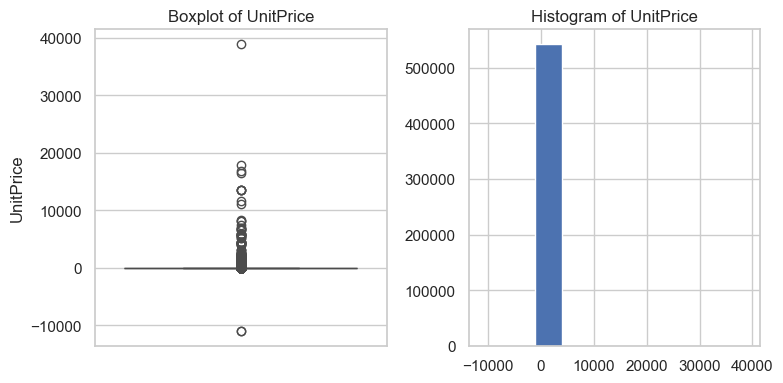

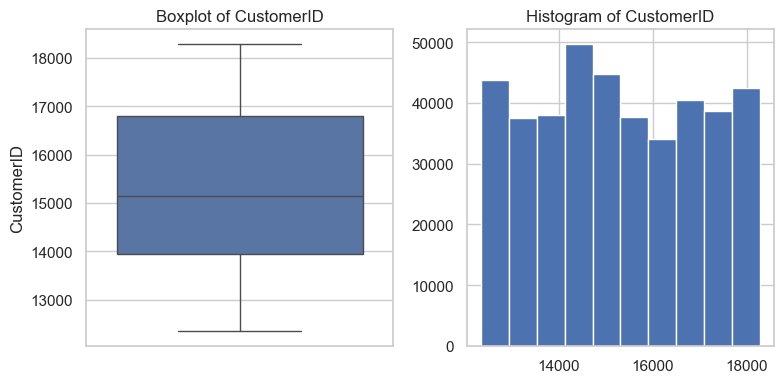

In [86]:
df_numeric = df.select_dtypes(include='number')

for i, col in enumerate(df_numeric.columns):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    sns.boxplot(data=df[col], ax=axs[0])
    axs[0].set_title(f"Boxplot of {col}")
    axs[1].hist(df[col])
    axs[1].set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

<p><b>Considerazioni:</b></p>
<ul>
    <li>Nei boxplot di Quantity e Unit price non si vedono i baffi. Il motivo è il range estremamente ampio dei valori nell'asse y, che vanno da -80995 a 80995 con moltissimi valori nel mezzo. La scatola e i baffi potrebbero essere quindi così piccoli da non essere visibili sul grafico per via dei pochi valori nella parte centrale della distribuzione rispetto agli estremi.</li>
    <li>Nella colonna Quantity del dataset il valore massimo è 80995 e il minimo è -80995, è quindi probabile che sia stato effettuato un rimborso dei prodotti acquistati.</li>
    <li>La stessa cosa si vede anche in altri acquisti, ad esempio l'utente con CustomerID 12346.0 risulta aver comprato una quantità pari a 74215 prodotti di "MEDIUM CERAMIC TOP STORAGE JAR", e poi lo stesso utente ha associata una quantità di -74215, dovuta probabilmente a un rimborso.</li>
</ul>

<h4><b>3. Preparazione Dati</b></h4>
<ul>
    <li>Nella colonna UnitPrice sono presenti molte celle con 0.0. Terremo questi valori in quanto è possibile che l'azienda metta ogni tanto dei prodotti in regalo per fidelizzare i clienti. Inoltre questo è coerente con lo scopo delle nostre analisi perchè, capendo quali sono i prodotti più acquistati, capiamo anche quali prodotti l'azienda può mettere ciclicamente in promozione per fidelizzare i clienti.</li>
    <li>Siccome le nostre analisi sono finalizzate ad analizzare il comportamento "tipico" dei clienti, escluderemo anche i rimborsi con quantità superiore a 10000 e inferiore a -10000. Rimuoveremo quindi i rimborsi con quantità estreme per concentrarci sull'analisi delle vendite più comuni.</li> 
</ul>

<h4><b>3.1. Pulizia Dati</b></h4>


<h4>Rimozione valori anomali</h4>

In [87]:
# Rimuovi i valori nella colonna 'Quantity' sopra 10000 e sotto -10000
df_cleaned = df[(df['Quantity'] <= 10000) & (df['Quantity'] >= -10000)]

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h4>Rimozione valori duplicati</h4>

In [88]:
# Rimuovi le righe duplicate basate su 'CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice', 'Description', 'Country'
df_cleaned = df.drop_duplicates(subset=['CustomerID', 'InvoiceDate', 'StockCode', 'Quantity', 'UnitPrice', 'Description', 'Country'])

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h4><b>3.2. Visualizzazione Dati</b></h4>

<h4>Matrice di correlazione tra Quantità e Prezzo Unitario</h4>

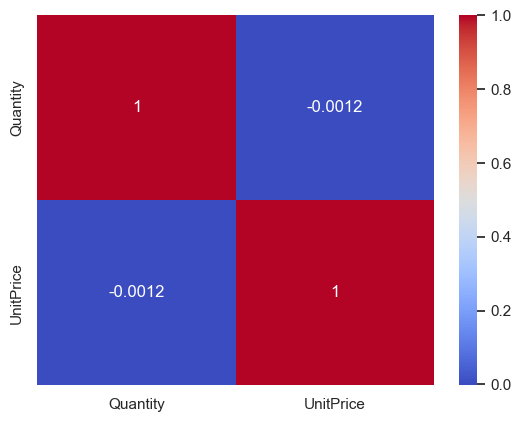

In [89]:
df_bought = df_cleaned[df_cleaned['Quantity'] > 0]

selected_columns = df_cleaned[['Quantity', 'UnitPrice']]

# Calcola la matrice di correlazione per le colonne numeriche
correlation_matrix = selected_columns.corr()

# Crea una heatmap della matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostra il grafico
plt.show()

<p><b>Considerazioni:</b></p>
<ul>
    <li>Quantity e UnitPrice: -0.0012. Non c'è una correlazione lineare significativa tra la quantità acquistata di un prodotto e il suo prezzo unitario</li>
    <li>Quindi il prezzo del prodotto non influenza la quantità con cui questo prodotto verrà acquistato</li>
</ul>

<h4>Matrice di correlazione tra le diverse categorie di prodotti (considerando i 10 prodotti più venduti)</h4>

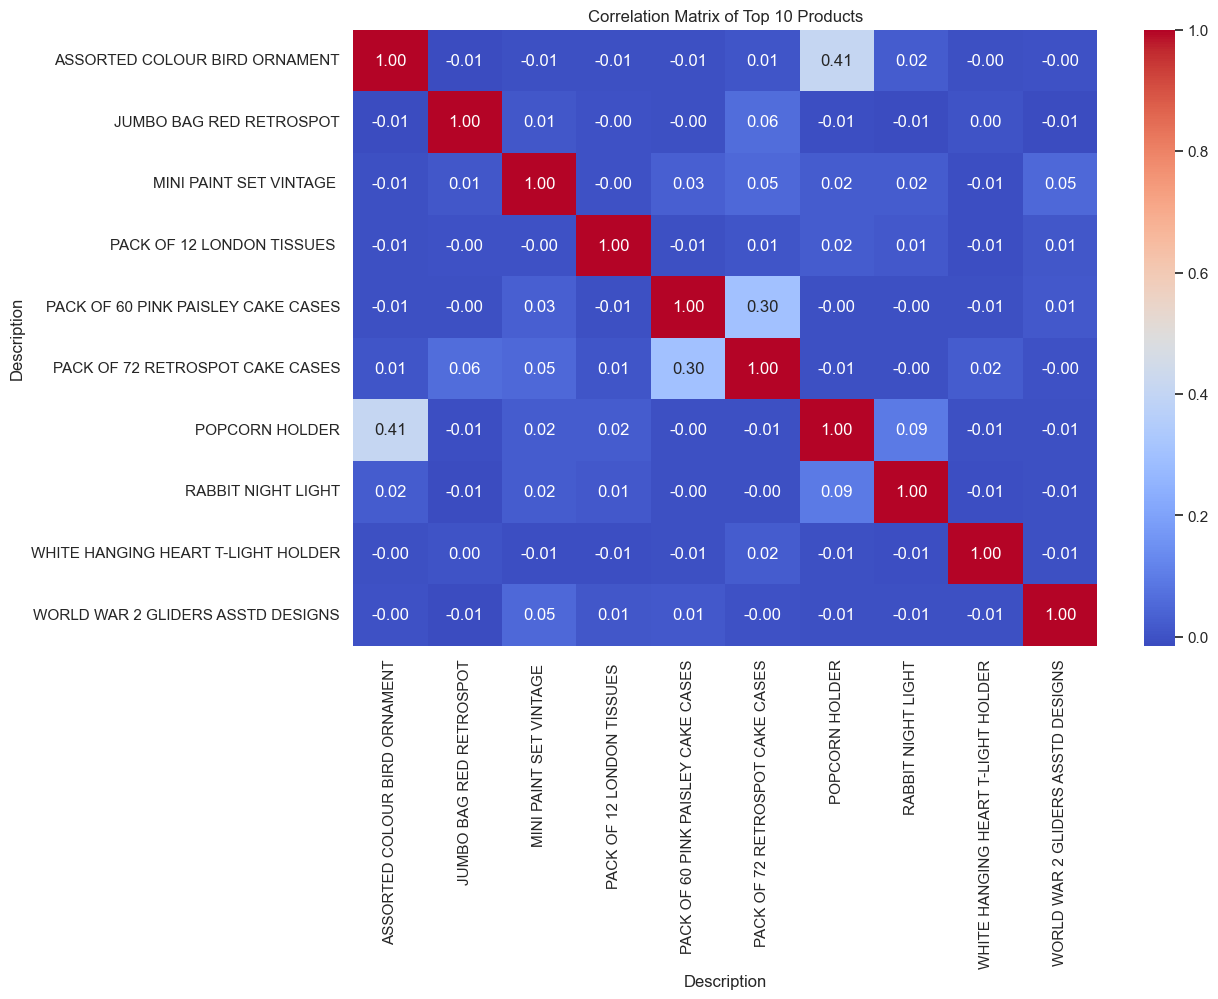

In [90]:
# Extract Top 10 Products by Quantity Sold
top_products = df_cleaned.groupby('Description')['Quantity'].sum().nlargest(10).index
top_products_df = df_cleaned[df_cleaned['Description'].isin(top_products)]

# Calculate Correlation
# Pivot the data to create a matrix of quantities with 'InvoiceNo' as rows and 'Description' as columns
pivot_df = top_products_df.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Calculate the correlation matrix using the corr() method
correlation_matrix = pivot_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Top 10 Products')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h4><b>Considerazioni</b></h4>
<ul>
    <li>La maggior parte dei coefficienti di correlazione sono molto vicini a zero, indicando che non esiste una forte relazione lineare tra le vendite dei diversi prodotti</li>
    <li>Gli unici prodotti che mostrano una leggera correlazione positiva sono "assorted colour bird ornament" con "popcorn holder" e i "pink paislay cake cases con i "retrospot cake cases", quindi i prodotti per le feste.</li>
    <li>Non ci sono correlazioni lineari negative significative</li>
    <li>Questo ci fa capire che i clienti tendono ad acquistare i prodotti in modo indipendente</li>
</ul>

<h4>Grafico a torta dei 10 prodotti più venduti</h4>

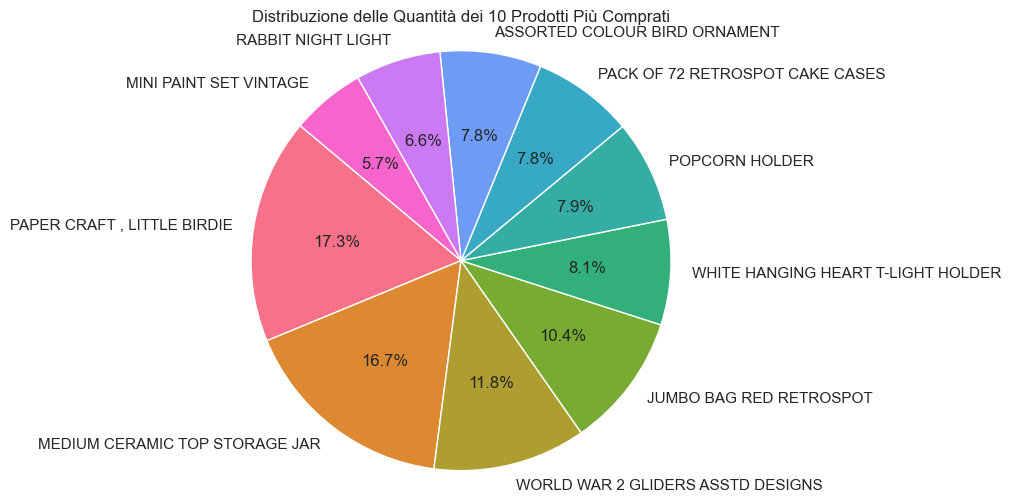

In [91]:
product_sales = df_bought.groupby('Description')['Quantity'].sum()

# Seleziona i 10 prodotti più comprati
top_10_products = product_sales.nlargest(10)

# Visualizza il grafico a torta utilizzando seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
top_10_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 10))
plt.title('Distribuzione delle Quantità dei 10 Prodotti Più Comprati')
plt.ylabel('')  # Rimuove l'etichetta dell'asse y
plt.axis('equal')  # Assicura che il grafico a torta sia disegnato come un cerchio
plt.show()

<h4>Grafico a torta dei 10 prodotti meno venduti</h4>

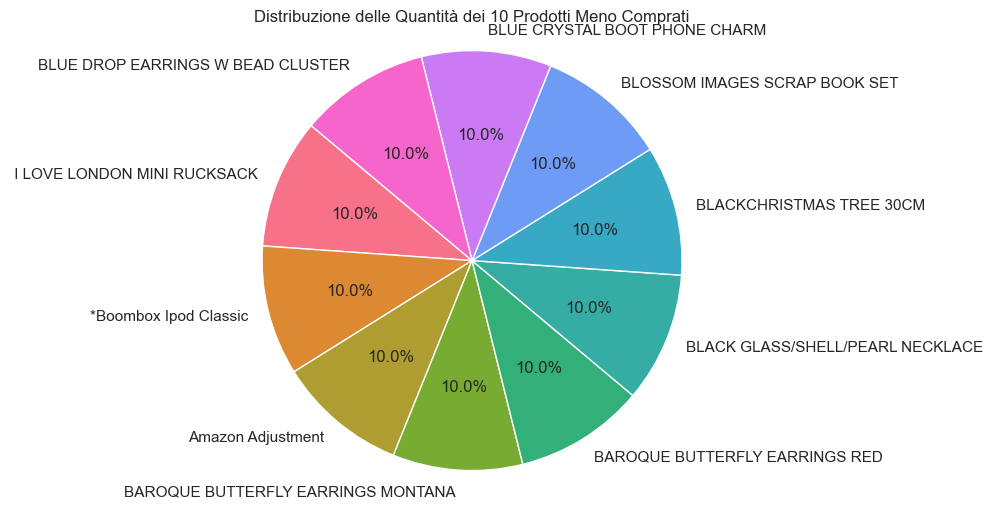

In [92]:
# Seleziona i 10 prodotti meno comprati
bottom_10_products = product_sales.nsmallest(10)

# Visualizza il grafico a torta utilizzando seaborn
plt.figure(figsize=(10, 6))
bottom_10_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 10))
plt.title('Distribuzione delle Quantità dei 10 Prodotti Meno Comprati')
plt.ylabel('')  # Rimuove l'etichetta dell'asse y
plt.axis('equal')  # Assicura che il grafico a torta sia disegnato come un cerchio
plt.show()

<h4>Segmentazione Clienti</h4>

In [94]:
# Data Preprocessing
# Filter out cancelled transactions
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'
}).reset_index()

# Rename columns for clarity
customer_df.columns = ['CustomerID', 'NumOrders']

# Prepare data for KMeans
X = customer_df[['NumOrders']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metodo del Gomito')
plt.xlabel('Numero di Cluster')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)

# Merge the cluster information back to the original dataframe
df = df.merge(customer_df[['CustomerID', 'Cluster']], on='CustomerID')

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='CustomerID', y='NumOrders', hue='Cluster', palette='viridis', s=100)
plt.title('Clienti Assegnati ai Rispettivi Cluster')
plt.xlabel('ID Cliente')
plt.ylabel('Numero di Ordini')
plt.legend(title='Cluster')
plt.show()

# Find the most purchased products for each cluster
top_products_per_cluster = df.groupby(['Cluster', 'Description'])['Quantity'].sum().reset_index()

# Get the top 10 products for each cluster
top_products_per_cluster = top_products_per_cluster.sort_values(['Cluster', 'Quantity'], ascending=[True, False]).groupby('Cluster').head(10)

# Plot bar charts and pie charts for each cluster
clusters = top_products_per_cluster['Cluster'].unique()
for cluster in clusters:
    cluster_data = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    
    # Bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(data=cluster_data, x='Quantity', y='Description')
    plt.title(f'Top Products for Cluster {cluster} - Istogramma')
    plt.xlabel('Quantita')
    plt.ylabel('Prodotto')
    plt.show()
    
    # Pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(cluster_data['Quantity'], labels=cluster_data['Description'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 10 Prodotti del Cluster {cluster} - Grafico a Torta')
    plt.xlabel('Quantita')
    plt.ylabel('Prodotto')
    plt.show()

AttributeError: Can only use .str accessor with string values!

<h4>Spiegazione Grafico</h4>
<ul>
    <li>Sull'asse x troviamo l'ID del cliente</li>
    <li>Sull'asse y leggiamo il numero di ordini effettuati da ciascun cliente</li>
    <li>I clienti sono stati divisi in 3 cluster:</li>
    <ul>
        <li>Il cluster 0 rappresenta i clienti che hanno effettuato il minor numero di acquisti</li>
        <li>Il cluster 1 rappresenta i clienti che hanno effettuato il maggior numero di acquisti</li>
        <li>Il cluster 2 rappresenta i clienti intermedi, che hanno effettuato tanti ordini, ma non quanto il quelli del cluster 1</li>
    </ul>
</ul>
<h4>Considerazioni sul Grafico</h4>
<ul>
    <li>Per i clienti del Cluster 0 si potrebbe pensare a offerte speciali per invogliarli ad aumentare la loro frequenza di acquisto.</li>
    <li>Per i clienti del Clustter 1 si può pensare di coinvolgerli con programmi di fidelizzazione esclusivi per mantenerli e incentivarli a continuiare ad acquistare.</li>
    <li>Per i clienti del Cluster 2 è possibile creare campagne di marketing mirate per ciascun cliente, offrendo promozioni e incentivi specifici in base ai loro comportamenti di acquisto.</li>
</ul>

<h1><b>4. Costruzione Modello</b></h1>
<h4><b>4.1. Selezione Modello</b></h2>
<h4><b>4.2. Addestramento Modello</b></h2>
<h4><b>4.3. Valutazione Modello</b></h2>

<h1><b>5. Valutazione</b></h1>
<h4><b>5.1. Risultati</b></h2>
<h4><b>5.2. Conclusioni</b></h2>
<h4><b>5.3. Possibili Miglioramenti</b></h2>